In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
%load_ext autoreload
%autoreload 2

import joblib
from os.path import join
from glob import glob

In [2]:
Nsim = 9844
simpath = csiborgtools.io.get_sim_path(Nsim)
Nsnap = 1016

In [3]:
fname = join(utils.dumpdir, "ramses_out_{}_{}.npy".format(str(Nsim).zfill(5), str(Nsnap).zfill(5)))

In [4]:
data = np.load(fname)

<IPython.core.display.Javascript object>


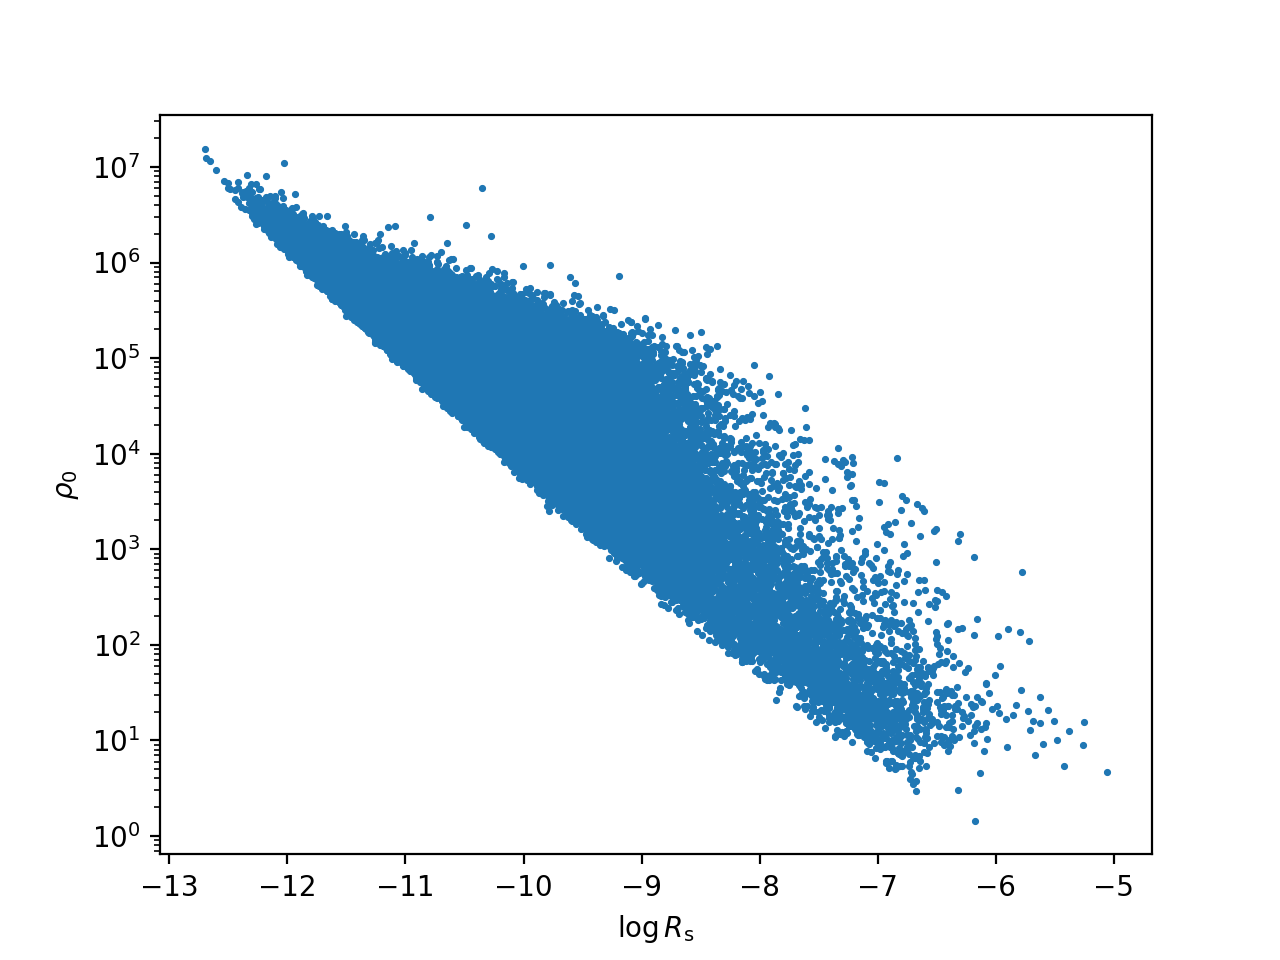

In [5]:
plt.figure()
plt.scatter(data["logRs"], data["rho0"], s=2.5, rasterized=True)
plt.yscale("log")

plt.ylabel(r"$\rho_0$")
plt.xlabel(r"$\log R_{\rm s}$")
# plt.savefig("../plots/rho0.png", dpi=450)
plt.show()

In [7]:

Nsplit = 33
dumpfolder = join(utils.dumpdir, "temp")

particles, clump_indxs, clumps = csiborgtools.fits.load_split_particles(Nsplit, dumpfolder, Nsim, Nsnap)

xs = csiborgtools.fits.pick_single_clump(44, particles, clump_indxs, clumps)
boxunits = csiborgtools.units.BoxUnits(Nsnap, simpath)


halo = csiborgtools.fits.Clump.from_arrays(*xs, rhoc=boxunits.box_rhoc)

post = csiborgtools.fits.NFWPosterior(halo)

In [8]:
post.enclosed_mass(3, 1, 1, use_jax=True)

DeviceArray(7.995911, dtype=float32, weak_type=True)

In [9]:
post.initlogRs

-3.9574279115393747

In [20]:
import jax

In [21]:
f = lambda x : post.loglikelihood(x, use_jax=True)

In [44]:
grad = jax.grad(f)
dx2 = jax.grad(grad)

In [30]:
post.maxpost_logRs()

-4.471040191273806

In [58]:
post.uncertainty_at_maxpost(-4.471040191273806)

0.06859312983109701

In [43]:
grad(-4.471040191273806 - 0.1)

DeviceArray(20.886763, dtype=float32, weak_type=True)

In [50]:
(- 1 / dx2(-4.471040191273806))**0.5

DeviceArray(0.06859313, dtype=float32, weak_type=True)

<IPython.core.display.Javascript object>


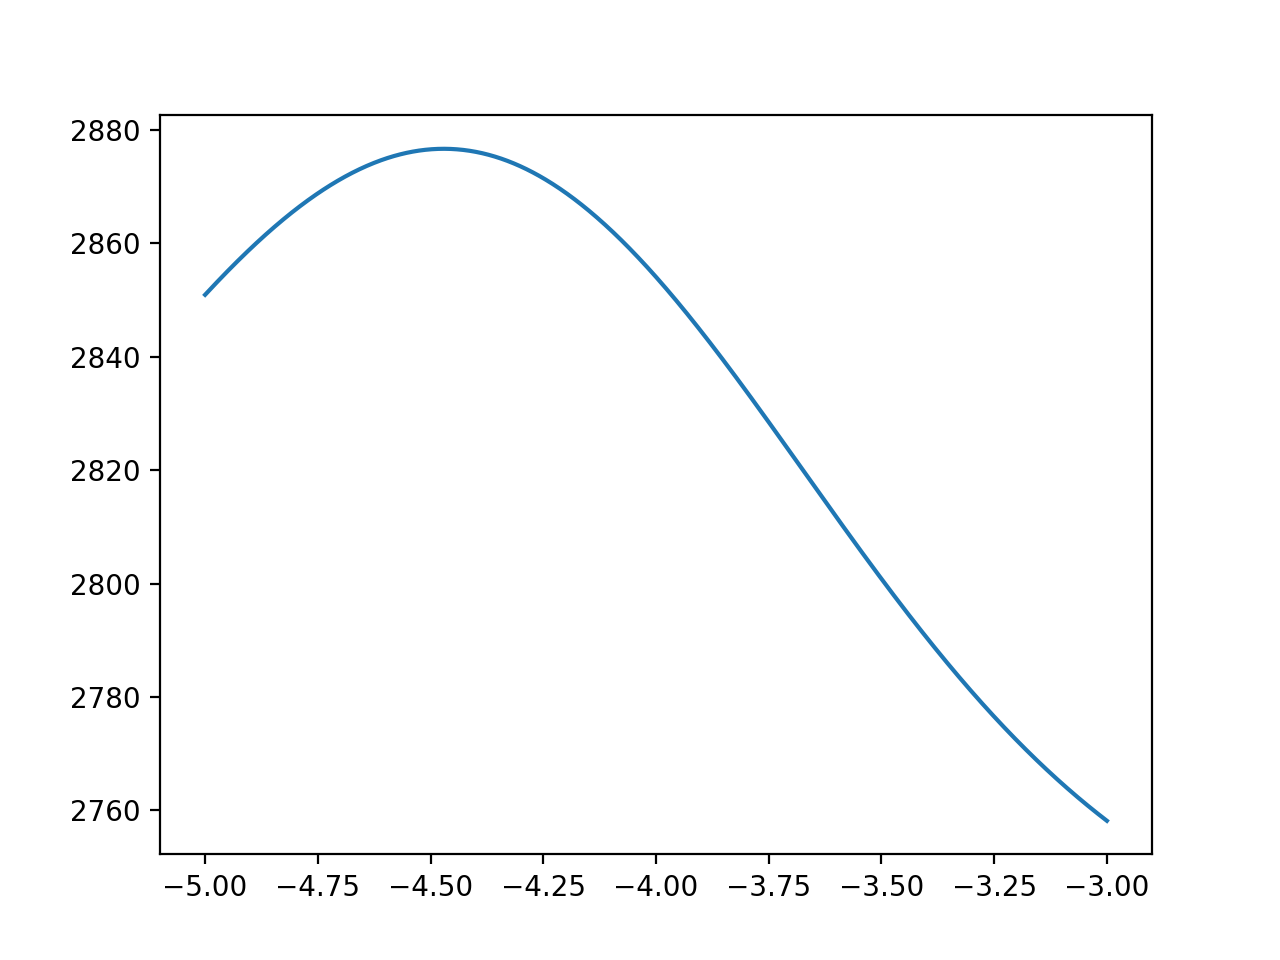

In [18]:
plt.figure()
plt.plot(t, y)
plt.show()

In [31]:
post.initlogRs

-3.9574279115393747

In [ ]:
# clump_ids = csiborgtools.io.read_clumpid(Nsnap, simpath)
# clumps = csiborgtools.io.read_clumps(Nsnap, simpath, )

# particles = csiborgtools.io.read_particle(["x", "y", "z", "M", "level"], Nsnap, simpath)
# clump_ids, particles = csiborgtools.io.drop_zero_indx(clump_ids, particles)

# with_particles = csiborgtools.fits.clump_with_particles(clump_ids, clumps)
# clumps = clumps[with_particles]

In [ ]:
f = join(utils.dumpdir, "ramses_out_09844_01016_123.npy")
f = np.load(f)

In [ ]:
plt.figure()
plt.hist(f["logRs"], bins="auto")
plt.show()